In [ ]:
import polars as pl
from tqdm import tqdm
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, explode, count, split, substring, size, when
spark = SparkSession.builder.appName('User Problem EDA').getOrCreate()

In [ ]:
df = spark.read.json("D:\\Data\\relations\\user-video.json")

In [ ]:
df.show()

+--------------------+-------+
|                 seq|user_id|
+--------------------+-------+
|[{[{190.0, 158843...|  U_112|
|[{[{506.0, 160406...|  U_150|
|[{[{4556.8, 15981...|  U_172|
|[{[{109.0, 159883...|  U_189|
|[{[{64.747, 15821...|  U_197|
|[{[{206.8, 159814...|  U_382|
|[{[{598.978027343...|  U_514|
|[{[{9.388, 160075...|  U_670|
|[{[{99.5, 1580808...|  U_783|
|[{[{454.848426, 1...|  U_796|
|[{[{231.0, 160258...|  U_817|
|[{[{567.2, 160078...|  U_981|
|[{[{595.0, 157961...| U_1071|
|[{[{9.7, 15989332...| U_1073|
|[{[{324.4, 158791...| U_1193|
|[{[{924.9, 158436...| U_1206|
|[{[{36.5, 1580867...| U_1323|
|[{[{391.5, 160091...| U_1361|
|[{[{130.4, 159765...| U_1368|
|[{[{1214.0, 16037...| U_1418|
+--------------------+-------+
only showing top 20 rows



In [ ]:
first_element = df.select("seq").first()
print(first_element["seq"])

[Row(segment=[Row(end_point=190.0, local_start_time=1588431144, speed=1.0, start_point=130.0), Row(end_point=250.0, local_start_time=1588431234, speed=1.0, start_point=220.0), Row(end_point=508.8, local_start_time=1588437359, speed=1.0, start_point=478.8), Row(end_point=692.55, local_start_time=1588437514, speed=1.25, start_point=655.1)], video_id='V_1395633'), Row(segment=[Row(end_point=170.0, local_start_time=1588438045, speed=1.0, start_point=135.0)], video_id='V_1395635'), Row(segment=[Row(end_point=180.8, local_start_time=1588438278, speed=1.5, start_point=128.3)], video_id='V_1395636'), Row(segment=[Row(end_point=106.25, local_start_time=1588438980, speed=1.25, start_point=100.0), Row(end_point=186.25, local_start_time=1588439045, speed=1.25, start_point=180.0)], video_id='V_1395639'), Row(segment=[Row(end_point=22.25, local_start_time=1601012656, speed=1.25, start_point=9.0), Row(end_point=271.5, local_start_time=1601012671, speed=1.25, start_point=28.0), Row(end_point=331.5, lo

In [ ]:
df = spark.read.json("D:\\Data\\entities\\course.json")
df.show()

+-------------------------------------+------------------------------+--------+--------------------------------+-------------+--------------------+
|                                about|                         field|      id|                            name|prerequisites|            resource|
+-------------------------------------+------------------------------+--------+--------------------------------+-------------+--------------------+
|通过老师导读，同学们可深入这一经典...|        [历史学, 中国语言文学]|C_584313|                《资治通鉴》导读|             |[{1.1.1, V_849, [...|
|本课程是理工科的一门数学基础课，系...|[应用经济学, 数学, 物理学, ...|C_584329|      微积分——极限理论与一元函数|             |[{1.1.1, V_1350, ...|
|掌握基本的摄影技能，了解图片新闻的...|          [艺术学, 新闻传播学]|C_584381|                        新闻摄影|             |[{1.1.1, V_1800, ...|
|  最有趣的理论+最有用的算法=不得不...|            [计算机科学与技术]|C_597208|            数据挖掘：理论与算法|             |[{1.1.1, V_2961, ...|
|大学计算机课程将以计算思维为导向，...|                            []|C_597225|                      大学计算机|         

In [ ]:
first_element = df.select("resource").first()
print(first_element["resource"])

[Row(chapter='1.1.1', resource_id='V_849', titles=['第一课 导论与三家分晋', '导论', '导论']), Row(chapter='1.2.1', resource_id='V_850', titles=['第一课 导论与三家分晋', '智伯的覆亡', '智伯的覆亡']), Row(chapter='1.3.1', resource_id='V_851', titles=['第一课 导论与三家分晋', '智伯悲剧的反思', '智伯的覆亡讨论']), Row(chapter='1.4', resource_id='Ex_856', titles=['第一课 导论与三家分晋', None, '第一课 导论与三家分晋--习题']), Row(chapter='2.1.1', resource_id='V_857', titles=['第二课 战国前期的政治', '魏文侯治国', '魏文侯治国']), Row(chapter='2.2.1', resource_id='V_859', titles=['第二课 战国前期的政治', '吴起的悲剧', '吴起的悲剧']), Row(chapter='2.3.1', resource_id='V_861', titles=['第二课 战国前期的政治', '魏文侯治国讨论', '魏文侯治国讨论']), Row(chapter='2.4.1', resource_id='V_862', titles=['第二课 战国前期的政治', '吴起的悲剧讨论', '吴起的悲剧讨论']), Row(chapter='2.5', resource_id='Ex_866', titles=['第二课 战国前期的政治', None, '第二课 战国前期的政治--习题']), Row(chapter='3.1.1', resource_id='V_867', titles=['第三课 商鞅变法', '背景', '背景']), Row(chapter='3.2.1', resource_id='V_868', titles=['第三课 商鞅变法', '过程', '过程']), Row(chapter='3.3.1', resource_id='V_869', titles=['第三课 商鞅变法', '商

In [ ]:
df = spark.read.json("D:\\Data\\entities\\reply.json")
df.show()

+-------------------+-----+-------------------------------------+----------+
|        create_time|   id|                                 text|   user_id|
+-------------------+-----+-------------------------------------+----------+
|2019-08-05 12:55:54| Rp_1|                             测试回复|U_10030806|
|2019-08-09 16:39:06| Rp_2|                                   赞|U_10031397|
|2019-08-10 22:39:35| Rp_3|                               好喜欢|U_10031531|
|2019-08-12 14:43:34| Rp_4|                             你也好棒|U_10031508|
|2019-08-12 14:44:51| Rp_5|                                 嗯对|U_10031508|
|2019-08-12 14:47:58| Rp_6|                           人工智能是|U_10031508|
|2019-08-13 09:41:32| Rp_7|           我的观点就是，你说啥就时啥|U_10031536|
|2019-08-13 09:41:42| Rp_8|           我的观点就是，你说啥就时啥|U_10031536|
|2019-08-13 09:41:53| Rp_9|           我的观点就是，你说啥就时啥|U_10031536|
|2019-08-13 09:41:59|Rp_10|           我的观点就是，你说啥就时啥|U_10031536|
|2019-08-19 18:08:53|Rp_11|                                11111|U_100

## Load file user-problem

In [ ]:
df = spark.read.json("D:\\Data\\relations\\user-problem.json")

In [ ]:
df.show()

+--------+----------+----------------+----------+-----+-------------------+----------+
|attempts|is_correct|          log_id|problem_id|score|        submit_time|   user_id|
+--------+----------+----------------+----------+-----+-------------------+----------+
|       1|         0|   10000_6906522|Pm_6906522| NULL|2020-10-27 10:11:56|   U_10000|
|       1|         0|   10000_6906523|Pm_6906523| NULL|2020-10-27 10:12:13|   U_10000|
|       1|         1|   10000_6906524|Pm_6906524| NULL|2020-10-27 10:12:28|   U_10000|
|       1|         0|   10000_6906525|Pm_6906525| NULL|2020-10-27 10:14:56|   U_10000|
|       1|         0|   10000_6906526|Pm_6906526| NULL|2020-10-27 10:15:18|   U_10000|
|       1|         0|   10000_6906527|Pm_6906527| NULL|2020-10-27 10:15:41|   U_10000|
|       1|         0|   10000_6906528|Pm_6906528| NULL|2020-10-27 10:16:21|   U_10000|
|       3|         0|10000130_3624759|Pm_3624759| -1.0|2020-05-19 16:57:44|U_10000130|
|       2|         0|10000130_3624760|Pm_36

## 1. Khám phá dữ liệu

### 1.1 Thống kê mô tả

In [ ]:
df.columns

['attempts',
 'is_correct',
 'log_id',
 'problem_id',
 'score',
 'submit_time',
 'user_id']

In [ ]:
num_rows = df.count()
num_columns = len(df.columns)
print(f"Số hàng: {num_rows}, Số cột: {num_columns}")

Số hàng: 133384333, Số cột: 7


In [ ]:
df.describe().show()

+-------+------------------+-------------------+----------------+----------+------------------+-------------------+---------+
|summary|          attempts|         is_correct|          log_id|problem_id|             score|        submit_time|  user_id|
+-------+------------------+-------------------+----------------+----------+------------------+-------------------+---------+
|  count|         133384333|          133384333|       133384333| 133384333|          62548071|          133384333|133384333|
|   mean|1.0587057776867992| 0.8613328373430483|            NULL|      NULL|1.1597642475656842|               NULL|     NULL|
| stddev|0.4070407094843258|0.34559887377285964|            NULL|      NULL|1.5961156676355879|               NULL|     NULL|
|    min|                 1|                  0|10000130_3624759| Pm_100561|              -1.0|2020-05-01 00:00:00|  U_10000|
|    max|               458|                  1|  999999_1587535|  Pm_99793|             100.0|2020-12-14 04:00:23| U_

In [ ]:
df.groupBy('attempts').count().show()

+--------+-----+
|attempts|count|
+--------+-----+
|      29|  182|
|      26|  267|
|      65|    8|
|      19|  700|
|      54|   13|
|      22|  444|
|       7|10764|
|      34|  101|
|      50|   27|
|      57|   11|
|      32|  117|
|      43|   46|
|      31|  145|
|      39|   65|
|      25|  280|
|      71|    6|
|       6|18690|
|      72|    4|
|      58|    3|
|       9| 5589|
+--------+-----+
only showing top 20 rows



In [ ]:
df.groupBy('is_correct').count().show()

+----------+---------+
|is_correct|    count|
+----------+---------+
|         0| 18496027|
|         1|114888306|
+----------+---------+



In [ ]:
df.groupBy('log_id').count().show()

+----------------+-----+
|          log_id|count|
+----------------+-----+
|10000130_4007395|    1|
|10000130_4913874|    1|
|10000130_5577606|    1|
|10000242_4913875|    1|
|10000242_5186646|    1|
|10000423_4155670|    1|
|10000446_4913874|    1|
|10000446_5567925|    1|
|10000531_5567926|    1|
|10000533_3624762|    1|
|10000533_5577605|    1|
|10000572_5577605|    1|
|10000611_3623005|    1|
|10000611_4462605|    1|
|10000617_5577606|    1|
|10000656_4125691|    1|
|10000659_4160061|    1|
|10000660_4913874|    1|
|10000660_5567925|    1|
|10000660_5577605|    1|
+----------------+-----+
only showing top 20 rows



In [ ]:
df.groupBy('problem_id').count().show()

+----------+-----+
|problem_id|count|
+----------+-----+
|Pm_3580431|   21|
|Pm_3541954|   22|
|Pm_4462647|   29|
|Pm_5939298| 1125|
|Pm_3919063|   25|
|Pm_3483913|    6|
|Pm_3640538|   27|
|Pm_5957397| 3226|
|Pm_1540331|  114|
|Pm_5943486| 3037|
|Pm_5943792| 2086|
|Pm_1612807|   47|
|Pm_1612856|   49|
|Pm_1612861|   49|
|Pm_1612888|   46|
|Pm_8375157|    7|
|Pm_3331584|  134|
|Pm_5870388|  173|
|Pm_5870487|  154|
|Pm_5871019|  122|
+----------+-----+
only showing top 20 rows



In [ ]:
df.groupBy('score').count().show()

+-----+--------+
|score|   count|
+-----+--------+
|  8.0|   64282|
|  0.0| 9841204|
|  7.0|   46390|
|  3.5|    7647|
|  9.5|    1562|
|  0.2|    1940|
|  4.5|    7717|
| -1.0|  333232|
| 29.0|     226|
|  6.5|    2217|
| NULL|70836262|
| 35.0|     929|
| 18.0|    2369|
|  8.4|     120|
|  2.5|   34464|
|  1.0|41727941|
|  0.8|   16376|
| 34.0|      72|
| 25.0|   11319|
|  8.8|     225|
+-----+--------+
only showing top 20 rows



In [ ]:
df.groupBy('submit_time').count().show()

+-------------------+-----+
|        submit_time|count|
+-------------------+-----+
|2020-05-17 18:16:48|   21|
|2020-07-20 18:23:53|    5|
|2020-07-19 23:47:04|    4|
|2020-07-15 11:31:14|    8|
|2020-07-20 01:39:06|    1|
|2020-05-09 23:40:54|   10|
|2020-06-28 11:32:45|   15|
|2020-07-19 21:37:35|    9|
|2020-07-18 15:53:40|    8|
|2020-05-17 09:48:10|   11|
|2020-05-24 22:37:42|   19|
|2020-07-20 14:27:51|    4|
|2020-06-05 22:43:05|   11|
|2020-05-17 22:56:11|   18|
|2020-07-04 22:10:00|   13|
|2020-06-29 21:29:12|   29|
|2020-07-02 10:28:33|   12|
|2020-06-19 17:22:19|    9|
|2020-05-10 11:23:31|    8|
|2020-07-08 12:49:01|    5|
+-------------------+-----+
only showing top 20 rows



In [ ]:
df.groupBy('user_id').count().show()

+----------+-----+
|   user_id|count|
+----------+-----+
|U_10000768|   16|
|U_10019687|   11|
| U_1003826|   43|
|U_10068846|   16|
|U_10123199|  198|
|U_10187251|   47|
|U_10207072|  491|
|U_10210558|    3|
|U_10212260|  252|
|U_10223092|    4|
|U_10241287|   38|
|U_10243522|   47|
|U_10249958|    8|
|U_10272869|   30|
|U_10297321|   23|
|U_10322676|   31|
|U_10337482|   36|
|U_10359501|  339|
|U_10359636|  190|
|U_10359706|  270|
+----------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

columns = df.columns
missing_counts = df.agg(*[spark_sum(col(c).isNull().cast("int")).alias(c) for c in columns])

In [ ]:
missing_counts.show()

+--------+----------+------+----------+--------+-----------+-------+
|attempts|is_correct|log_id|problem_id|   score|submit_time|user_id|
+--------+----------+------+----------+--------+-----------+-------+
|       0|         0|     0|         0|70836262|          0|      0|
+--------+----------+------+----------+--------+-----------+-------+



### Nhận xét:
* Đây là một file dữ liệu lớn với 133384333 hàng và 7 cột.
* Các cột có các giá trị trùng lặp.
* Chỉ có duy nhất cột log_id là unique key của user_id và problem_id là không có giá trị trùng lặp nên bảng này dữ liệu không bị trùng lặp.
* Các giá trị của các cột cũng nhất quán và không bị nhiễu.
* Chỉ có cột score chứa khá nhiều giá trị NULL.

### 1.2 Trực quan hóa dữ liệu

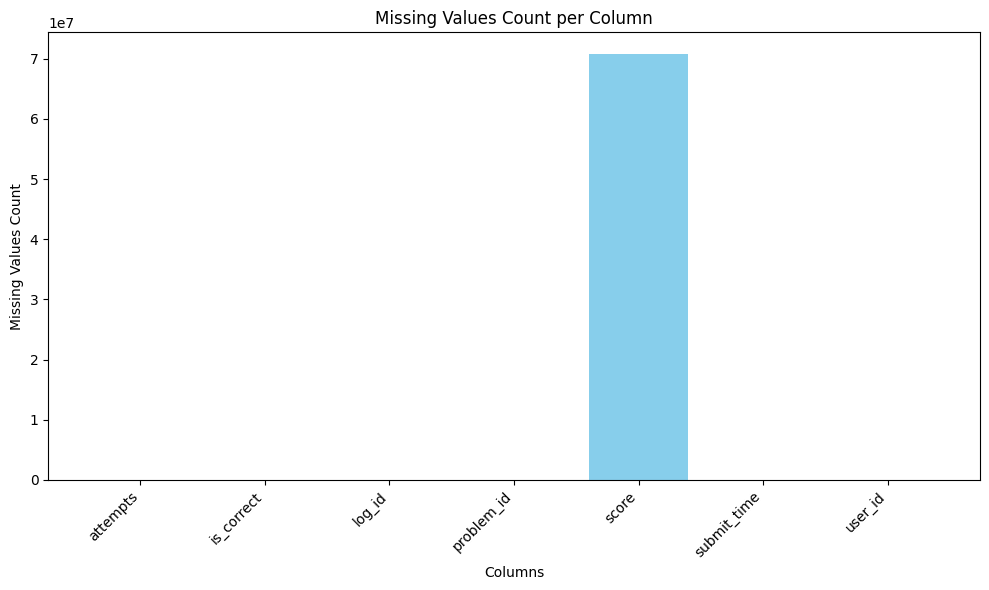

In [ ]:
missing_counts_pd = missing_counts.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(missing_counts_pd.columns, missing_counts_pd.values.flatten(), color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count per Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
count_attempts = df.groupBy('attempts').count().toPandas().sort_values('count', ascending=False)

In [ ]:
count_attempts

,attempts,count
29,1,128117376
42,2,3664926
33,3,1144368
43,4,321551
28,5,69068
...,...,...
99,107,1
100,104,1
101,120,1
103,106,1


### Biểu đồ cho cột attempts (chỉ lấy 20 giá trị có số lượng count nhiều nhất)

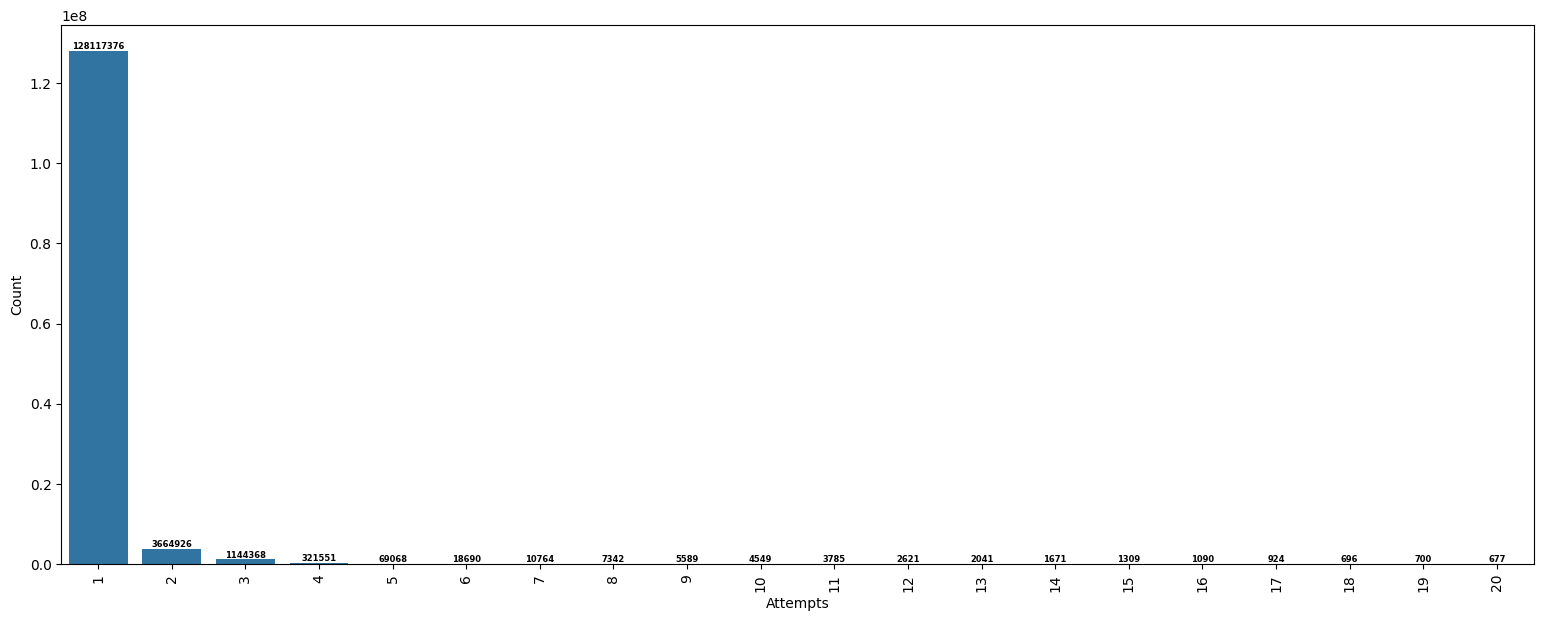

In [ ]:

# Vẽ biểu đồ cột
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='attempts', y='count', data=count_attempts[0:20])
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Vị trí x giữa cột
        p.get_height() + 0.5,           # Vị trí y trên cột
        f'{int(p.get_height())}',      # Văn bản chú thích (làm tròn thành số nguyên)
        ha='center',                   # Căn chỉnh ngang
        va='bottom',                   # Căn chỉnh dọc
        fontweight='bold',             # Độ đậm
        fontsize = 6
    )
plt.xlabel('Attempts')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
count_attempts = df.groupBy('is_correct').count().toPandas().sort_values('count', ascending=False)

In [ ]:
count_attempts

,is_correct,count
1,1,114888306
0,0,18496027


### Biểu đồ cho cột is_correct

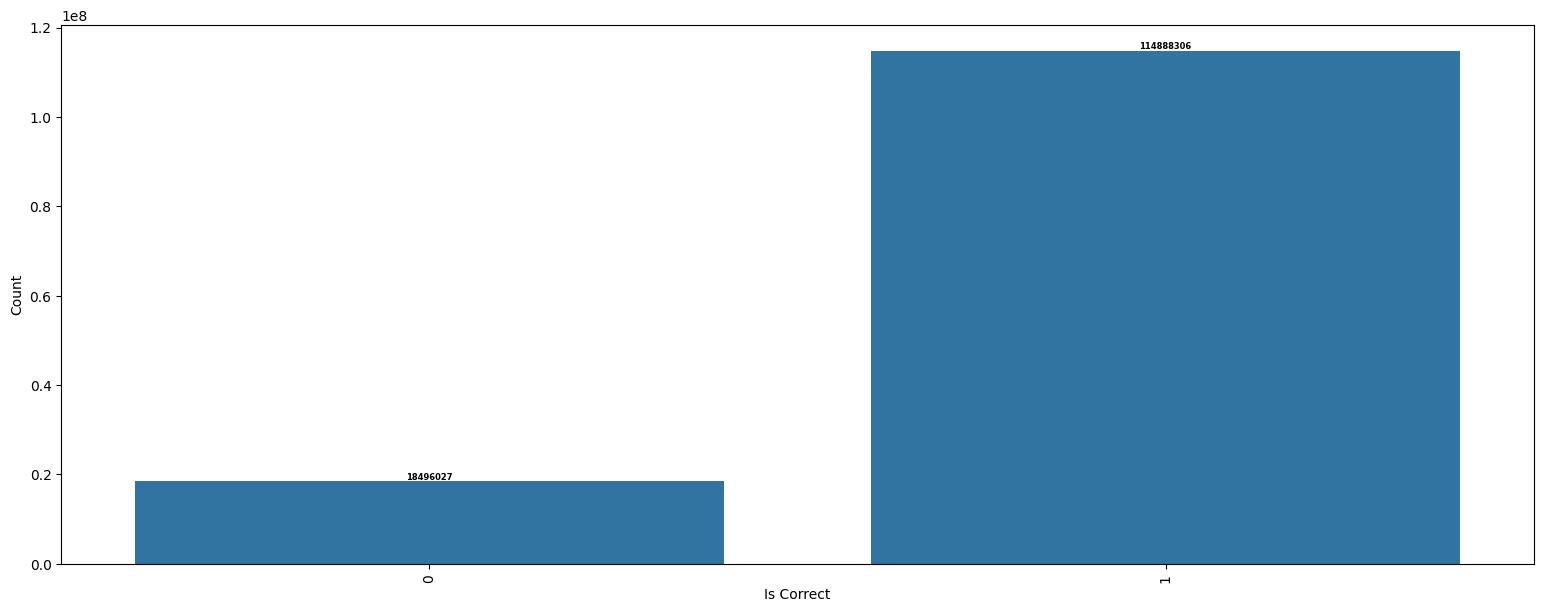

In [ ]:

# Vẽ biểu đồ cột
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='is_correct', y='count', data=count_attempts)
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Vị trí x giữa cột
        p.get_height() + 0.5,           # Vị trí y trên cột
        f'{int(p.get_height())}',      # Văn bản chú thích (làm tròn thành số nguyên)
        ha='center',                   # Căn chỉnh ngang
        va='bottom',                   # Căn chỉnh dọc
        fontweight='bold',             # Độ đậm
        fontsize = 6
    )
plt.xlabel('Is Correct')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
count_attempts = df.groupBy('problem_id').count().toPandas().sort_values('count', ascending=False)

In [ ]:
count_attempts

,problem_id,count
552796,Pm_3296033,151080
877585,Pm_3296034,150954
1214183,Pm_3296031,150910
114971,Pm_3296029,150897
1101096,Pm_3296032,150881
...,...,...
1093096,Pm_5919001,1
1093103,Pm_7915831,1
1093104,Pm_7915912,1
1093105,Pm_7915939,1


### Biểu đồ cho cột problem_id (chỉ lấy 20 giá trị có số lượng count nhiều nhất)

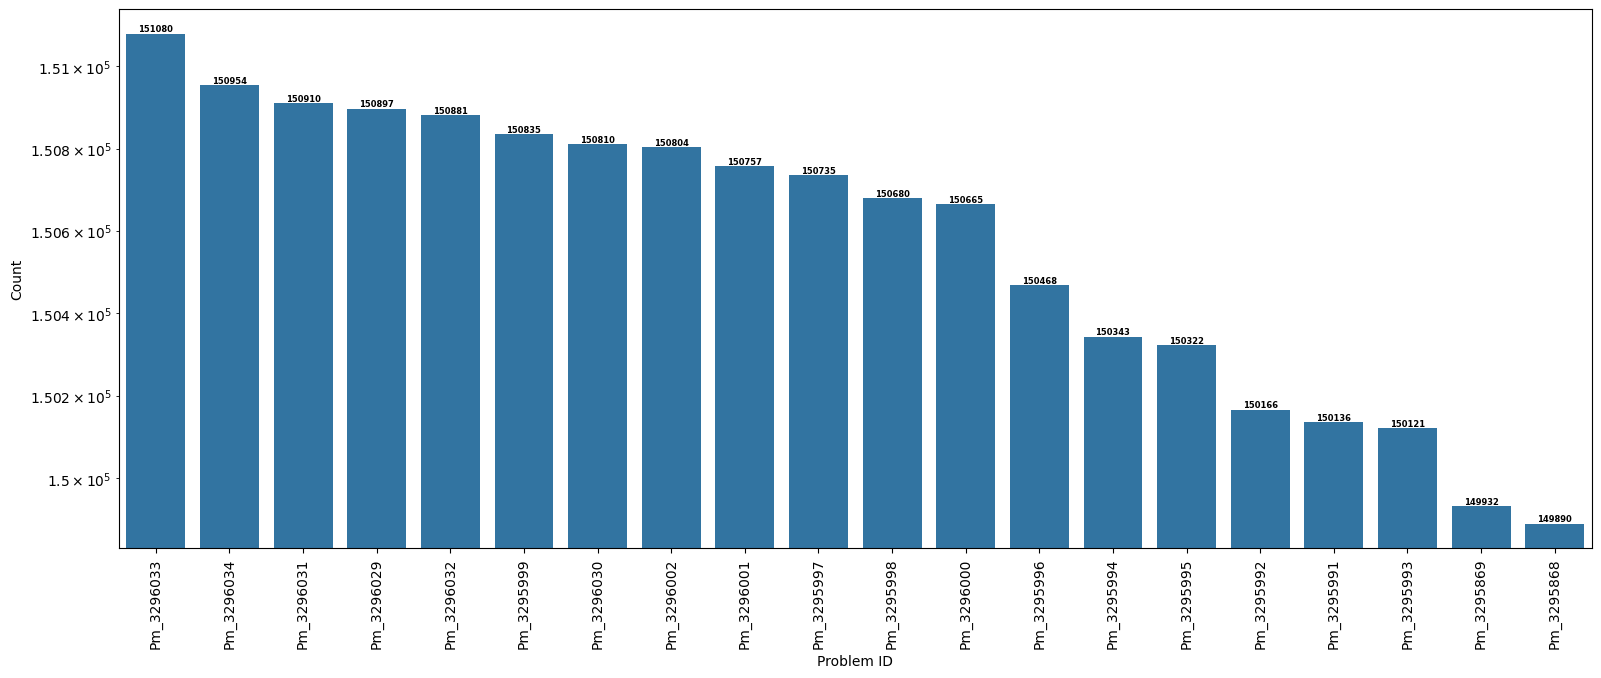

In [ ]:

# Vẽ biểu đồ cột
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='problem_id', y='count', data=count_attempts[0:20])
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Vị trí x giữa cột
        p.get_height() + 0.5,           # Vị trí y trên cột
        f'{int(p.get_height())}',      # Văn bản chú thích (làm tròn thành số nguyên)
        ha='center',                   # Căn chỉnh ngang
        va='bottom',                   # Căn chỉnh dọc
        fontweight='bold',             # Độ đậm
        fontsize = 6
    )
plt.yscale('log')
plt.xlabel('Problem ID')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
count_attempts = df.groupBy('score').count().toPandas().sort_values('count', ascending=False)

In [ ]:
count_attempts

,score,count
10,NaN,70836262
15,1.0,41727941
1,0.0,9841204
34,2.0,7959997
48,5.0,631493
...,...,...
196,27.5,1
194,61.0,1
192,64.0,1
190,69.0,1


### Biểu đồ cho cột score

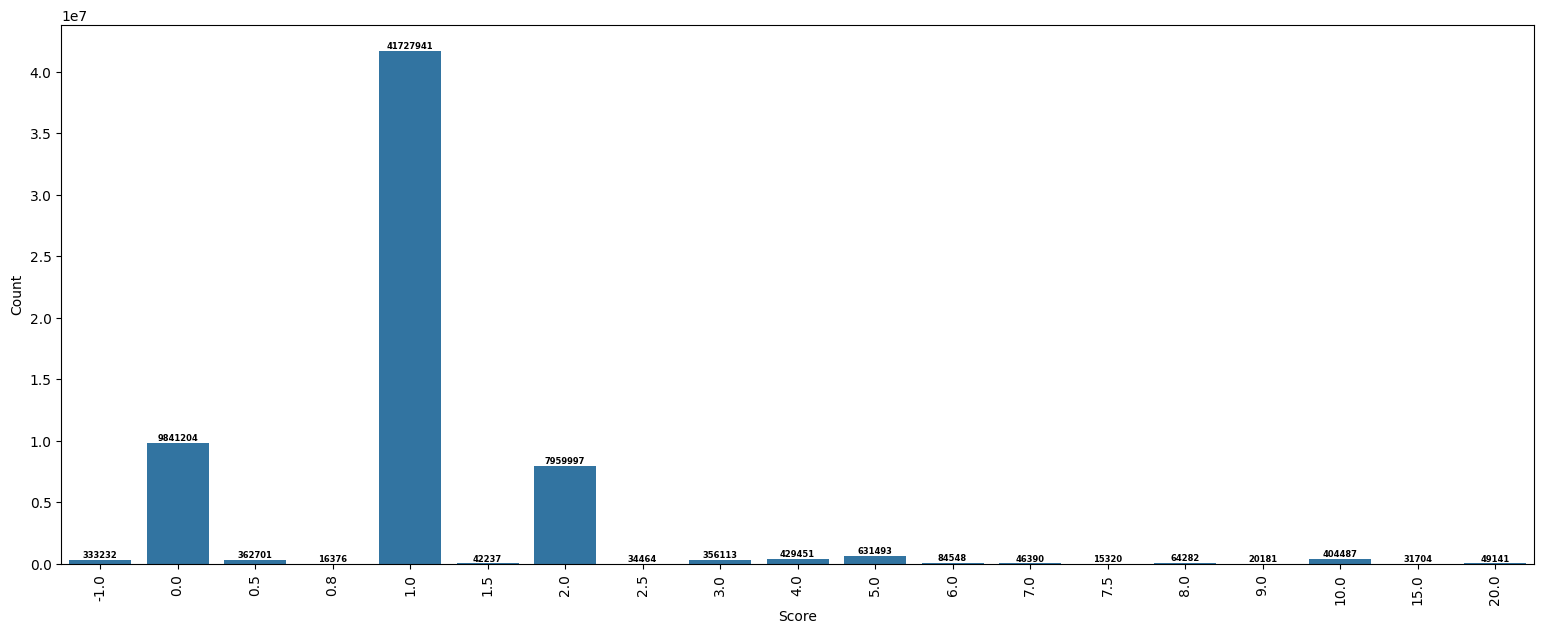

In [ ]:

# Vẽ biểu đồ cột
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='score', y='count', data=count_attempts[0:20])
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Vị trí x giữa cột
        p.get_height() + 0.5,           # Vị trí y trên cột
        f'{int(p.get_height())}',      # Văn bản chú thích (làm tròn thành số nguyên)
        ha='center',                   # Căn chỉnh ngang
        va='bottom',                   # Căn chỉnh dọc
        fontweight='bold',             # Độ đậm
        fontsize = 6
    )
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
count_attempts = df.groupBy('user_id').count().toPandas().sort_values('count', ascending=False)

In [ ]:
count_attempts

,user_id,count
39400,U_28934310,22743
1027223,U_55721,6399
658840,U_29071298,4894
358225,U_30003776,4679
1142552,U_11389969,4347
...,...,...
93714,U_37322529,1
93716,U_37323747,1
1171130,U_19948556,1
583396,U_33444234,1


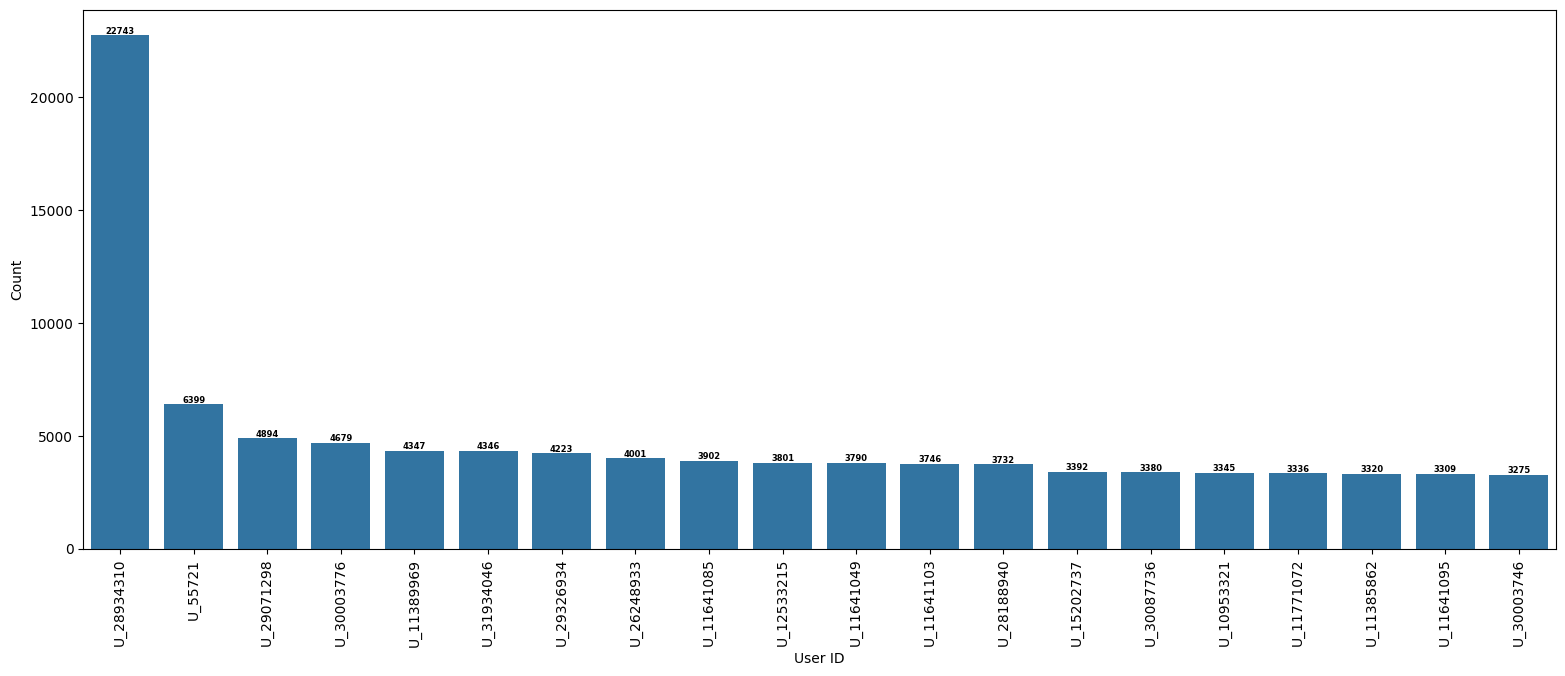

In [ ]:

# Vẽ biểu đồ cột
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='user_id', y='count', data=count_attempts[0:20])
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Vị trí x giữa cột
        p.get_height() + 0.5,           # Vị trí y trên cột
        f'{int(p.get_height())}',      # Văn bản chú thích (làm tròn thành số nguyên)
        ha='center',                   # Căn chỉnh ngang
        va='bottom',                   # Căn chỉnh dọc
        fontweight='bold',             # Độ đậm
        fontsize = 6
    )
plt.xlabel('User ID')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


## 2. Làm sạch dữ liệu (dữ liệu chỉ có dữ liệu bị NULL ở cột score, không có dữ liệu nhiễu, nhất quán hay trung lặp)

### 2.1 Xử lý dữ liệu thiếu

In [ ]:
null_scores = df.filter(df['score'].isNull())
num_null_scores = null_scores.count()
total_rows = df.count()
null_score_ratio = (num_null_scores / total_rows) * 100

print(f"Số lượng score bị NULL: {num_null_scores}")
print(f"Tỷ lệ score bị NULL: {null_score_ratio:.2f}%")

Số lượng score bị NULL: 70836262
Tỷ lệ score bị NULL: 53.11%


### Tỷ lệ giá trị NULL chiếm hơn 1 nửa trong cột score và nhóm cũng không biết nên điền các giá trị null như thế nào cho hợp lí nên sẽ quyết định bỏ cột này.

In [ ]:
df = df.drop('score')
df.show()

+--------+----------+----------------+----------+-------------------+----------+
|attempts|is_correct|          log_id|problem_id|        submit_time|   user_id|
+--------+----------+----------------+----------+-------------------+----------+
|       1|         0|   10000_6906522|Pm_6906522|2020-10-27 10:11:56|   U_10000|
|       1|         0|   10000_6906523|Pm_6906523|2020-10-27 10:12:13|   U_10000|
|       1|         1|   10000_6906524|Pm_6906524|2020-10-27 10:12:28|   U_10000|
|       1|         0|   10000_6906525|Pm_6906525|2020-10-27 10:14:56|   U_10000|
|       1|         0|   10000_6906526|Pm_6906526|2020-10-27 10:15:18|   U_10000|
|       1|         0|   10000_6906527|Pm_6906527|2020-10-27 10:15:41|   U_10000|
|       1|         0|   10000_6906528|Pm_6906528|2020-10-27 10:16:21|   U_10000|
|       3|         0|10000130_3624759|Pm_3624759|2020-05-19 16:57:44|U_10000130|
|       2|         0|10000130_3624760|Pm_3624760|2020-05-24 16:33:08|U_10000130|
|      11|         0|1000013

## 3. Chuyển đổi dữ liệu

### Thêm một cột course_id vào file user-problem, mỗi course_id ứng với problem_id tương ứng

### 3.1 Tạo các biến mới

In [ ]:
path = "D:\\Data\\entities\\course.json"
course = pd.read_json(path, lines=True)
course

,id,name,field,prerequisites,about,resource
0,C_584313,《资治通鉴》导读,"[历史学, 中国语言文学]",,通过老师导读，同学们可深入这一经典文本内部，得以纵览千年历史，提升国学素养，体味人生智慧。,"[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso..."
1,C_584329,微积分——极限理论与一元函数,"[应用经济学, 数学, 物理学, 理论经济学]",,本课程是理工科的一门数学基础课，系统、全面地介绍了一元函数微积分学。课程既保持了数学的严谨和...,"[{'titles': ['序言', '序言', '序言'], 'resource_id':..."
2,C_584381,新闻摄影,"[艺术学, 新闻传播学]",,掌握基本的摄影技能，了解图片新闻的工作方式，训练对生活的观察和热爱，发展对图像的审美和批评能...,"[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res..."
3,C_597208,数据挖掘：理论与算法,[计算机科学与技术],,最有趣的理论+最有用的算法=不得不学的数据科学。,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide..."
4,C_597225,大学计算机,[],,大学计算机课程将以计算思维为导向，以计算机原理、概念为基础，以新技术新方法为牵引，以创新思维...,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],..."
...,...,...,...,...,...,...
3776,C_2338076,（疾风计划）软件工程,[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第1章 初识软件工程 ', '1.1 软件无处不在 ', '讲课..."
3777,C_2341259,（疾风计划）面向对象程序设计（C++）,[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第一讲 课程简介与编程环境', '1.0 课程定位、教学内容',..."
3778,C_2337996,（疾风计划）数据结构(下),[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第零章 ', '选课之前', '宣传片'], 'resourc..."
3779,C_1945689,机器学习训练营,[],,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"[{'titles': ['序-开营仪式及学习课件', None, '1.1_初识机器学习'..."


In [ ]:
df_expanded = course.explode('resource')

# Trích xuất resource_id và course_id
df_expanded['resource_id'] = df_expanded['resource'].apply(lambda x: x['resource_id'])

# Group lại theo course_id và lấy danh sách các resource_id
grouped_data = df_expanded.groupby('id')['resource_id'].apply(list).reset_index()

In [ ]:
grouped_data

,id,resource_id
0,C_1017355,"[V_1617852, Ex_1617853, V_1617854, Ex_1617855,..."
1,C_1017419,"[V_1618247, Ex_1618248, V_1618249, V_1618250, ..."
2,C_1025064,"[V_1622546, V_1622547, V_1622548, V_1622549, V..."
3,C_1025076,"[V_1622858, V_1622859, V_1622860, V_1622861, V..."
4,C_1025079,"[V_1622989, V_1622990, V_1622991, V_1622992, E..."
...,...,...
3776,C_955163,"[V_1542335, V_1542336, V_1542337, V_1542338, E..."
3777,C_956128,"[V_1555005, V_1555006, V_1555007, Ex_1555008, ..."
3778,C_956129,"[V_1555097, V_1555098, V_1555099, V_1555100, E..."
3779,C_956130,"[V_6304309, Ex_6304318, V_6304310, Ex_6304321,..."


In [ ]:
path = "D:\\Data\\relations\\exercise-problem.txt"
ex_prob = pd.read_csv(path, sep='\t', header=None, names=['exercise_id', 'problem_id'])

In [ ]:
grouped_data_exploded = grouped_data.explode('resource_id')

# Nối DataFrame df_txt với DataFrame grouped_data_exploded
df_combined = pd.merge(ex_prob, grouped_data_exploded, left_on='exercise_id', right_on='resource_id', how='inner')

# Nhóm các problem_id theo course_id
grouped_problems = df_combined.groupby('id')['problem_id'].apply(list).reset_index()

In [ ]:
grouped_problems

,id,problem_id
0,C_1017355,"[Pm_2017603, Pm_2017604, Pm_2017605, Pm_201760..."
1,C_1017419,"[Pm_2018051, Pm_2018052, Pm_2018053, Pm_201805..."
2,C_1025064,"[Pm_2021644, Pm_2021645, Pm_2021646, Pm_202164..."
3,C_1025076,"[Pm_2021924, Pm_2021925, Pm_2021926, Pm_202192..."
4,C_1025079,"[Pm_2021960, Pm_2021961, Pm_2021962, Pm_202196..."
...,...,...
3196,C_955163,"[Pm_1940276, Pm_1940277, Pm_1940278, Pm_194027..."
3197,C_956128,"[Pm_1954671, Pm_1954672, Pm_1954673, Pm_195467..."
3198,C_956129,"[Pm_1954881, Pm_1954882, Pm_1954883, Pm_195488..."
3199,C_956130,"[Pm_5972635, Pm_5972636, Pm_5972637, Pm_597263..."


In [ ]:
grouped_problems.to_csv('course-problem.csv')

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType

custom_schema = StructType([
    StructField("No", StringType(), True),
    StructField("course_id", StringType(), True),
    StructField("grouped_problem_id", StringType(), True)
])


grouped_problems = spark.read.csv("course-problem.csv", header=True, schema=custom_schema)

In [ ]:
grouped_problems_with_array = grouped_problems.withColumn("grouped_problem_id_array", split(grouped_problems["grouped_problem_id"], ", "))

# Sử dụng hàm explode để tách các phần tử trong mảng thành các hàng riêng biệt
exploded_grouped_problems = grouped_problems_with_array.select(explode("grouped_problem_id_array").alias("problem_id"), "course_id")

# Hiển thị kết quả
exploded_grouped_problems.show()

+-------------+---------+
|   problem_id|course_id|
+-------------+---------+
|['Pm_2017603'|C_1017355|
| 'Pm_2017604'|C_1017355|
| 'Pm_2017605'|C_1017355|
| 'Pm_2017606'|C_1017355|
| 'Pm_2017607'|C_1017355|
| 'Pm_2017608'|C_1017355|
| 'Pm_2017609'|C_1017355|
| 'Pm_2017610'|C_1017355|
| 'Pm_2017611'|C_1017355|
| 'Pm_2017612'|C_1017355|
| 'Pm_2017613'|C_1017355|
| 'Pm_2017614'|C_1017355|
| 'Pm_2017615'|C_1017355|
| 'Pm_2017616'|C_1017355|
| 'Pm_2017617'|C_1017355|
| 'Pm_2017618'|C_1017355|
| 'Pm_2017619'|C_1017355|
| 'Pm_2017620'|C_1017355|
| 'Pm_2017621'|C_1017355|
| 'Pm_2017622'|C_1017355|
+-------------+---------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import regexp_replace

cleaned_exploded_grouped_problems = exploded_grouped_problems.withColumn("problem_id", regexp_replace(exploded_grouped_problems["problem_id"], "[\\[']", ""))

# Hiển thị kết quả
cleaned_exploded_grouped_problems.show()

+----------+---------+
|problem_id|course_id|
+----------+---------+
|Pm_2017603|C_1017355|
|Pm_2017604|C_1017355|
|Pm_2017605|C_1017355|
|Pm_2017606|C_1017355|
|Pm_2017607|C_1017355|
|Pm_2017608|C_1017355|
|Pm_2017609|C_1017355|
|Pm_2017610|C_1017355|
|Pm_2017611|C_1017355|
|Pm_2017612|C_1017355|
|Pm_2017613|C_1017355|
|Pm_2017614|C_1017355|
|Pm_2017615|C_1017355|
|Pm_2017616|C_1017355|
|Pm_2017617|C_1017355|
|Pm_2017618|C_1017355|
|Pm_2017619|C_1017355|
|Pm_2017620|C_1017355|
|Pm_2017621|C_1017355|
|Pm_2017622|C_1017355|
+----------+---------+
only showing top 20 rows



In [ ]:
joined_user_problem = df.join(cleaned_exploded_grouped_problems, df["problem_id"] == cleaned_exploded_grouped_problems["problem_id"], "inner")

In [ ]:
# Chọn cột course_id từ bảng exploded_grouped_problems để thêm vào bảng user-problem
joined_user_problem_with_course_id = joined_user_problem.select(df["*"], cleaned_exploded_grouped_problems["course_id"].alias("course_id"))

# Hiển thị kết quả
joined_user_problem_with_course_id.show()

+--------+----------+---------------+----------+-------------------+---------+---------+
|attempts|is_correct|         log_id|problem_id|        submit_time|  user_id|course_id|
+--------+----------+---------------+----------+-------------------+---------+---------+
|       1|         0|  10000_6906522|Pm_6906522|2020-10-27 10:11:56|  U_10000|C_2033958|
|       1|         0|  10000_6906523|Pm_6906523|2020-10-27 10:12:13|  U_10000|C_2033958|
|       1|         1|  10000_6906524|Pm_6906524|2020-10-27 10:12:28|  U_10000|C_2033958|
|       1|         0|  10000_6906525|Pm_6906525|2020-10-27 10:14:56|  U_10000|C_2033958|
|       1|         0|  10000_6906526|Pm_6906526|2020-10-27 10:15:18|  U_10000|C_2033958|
|       1|         0|  10000_6906527|Pm_6906527|2020-10-27 10:15:41|  U_10000|C_2033958|
|       1|         0|  10000_6906528|Pm_6906528|2020-10-27 10:16:21|  U_10000|C_2033958|
|       1|         1|1000454_7309497|Pm_7309497|2020-10-15 21:11:03|U_1000454|C_2199449|
|       1|         1|